## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merged_summary = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 
                                                        'median', 'var', 'std', 'sem', 'count'])
merged_summary = merged_summary.rename(columns={"mean": "Mean", "median": "Median", "var": "Variance",
                                                "std": "St Dev", "sem": "SEM", "count": "Entries"})
merged_summary

,Mean,Median,Variance,St Dev,SEM,Entries
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884,161
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


## Bar plots

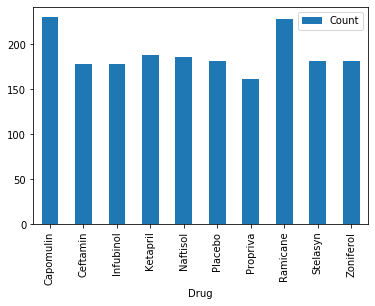

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_plot = pd.DataFrame({'Drug': merged_summary.index, 'Count':merged_summary['Entries']})
axis = bar_plot.plot.bar(x='Drug', y='Count', rot=90)

([<matplotlib.axis.XTick at 0x1a15c1d210>,
 <a list of 10 Text xticklabel objects>)

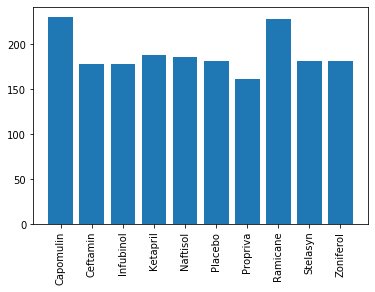

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(merged_summary["Entries"]))
plt.bar(x_axis, merged_summary["Entries"])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, merged_summary.index, rotation=90)

## Pie plots

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
drop_duplicates = merged_df.drop_duplicates("Mouse ID")
gender_distribution = drop_duplicates.groupby('Sex').count()
gender_distribution = gender_distribution[['Mouse ID']]
gender_distribution = gender_distribution.rename(columns={"Mouse ID": "Count"})
gender_distribution

,Count
Sex,
Female,124
Male,125


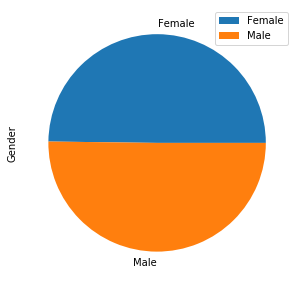

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plot = pd.DataFrame({'Gender': gender_distribution['Count']}, index= gender_distribution.index)
pie_plot_gender = pie_plot.plot.pie(y='Gender', figsize=(5, 5))

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens
time_status = merged_df.sort_values(by='Timepoint', ascending=False)
drop_duplicates_time = time_status.drop_duplicates("Mouse ID")
drop_duplicates_time.groupby("Drug Regimen").mean().sort_values(by='Tumor Volume (mm3)')

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Ramicane,10.840,20.000,40.600000,36.191390,1.200000
Capomulin,14.040,20.120,41.000000,36.667568,1.280000
Propriva,9.880,27.240,26.200000,56.736964,1.560000
Ceftamin,12.800,27.400,30.600000,57.753977,1.720000
Infubinol,16.400,27.320,30.600000,58.178246,1.600000
Zoniferol,12.600,27.920,31.400000,59.181258,2.000000
Placebo,10.680,28.040,31.200000,60.508414,2.080000
Stelasyn,13.125,27.875,32.708333,61.001707,1.458333
Naftisol,12.240,27.240,32.200000,61.205757,2.000000


In [9]:
print("The most viable options are Ramicane, Capomulin, Propriva, and Ceftamin")

The most viable options are Ramicane, Capomulin, Propriva, and Ceftamin


In [24]:
# Calculate the IQR and quantitatively determine if there are any potential outliers
viable_df = drop_duplicates_time.loc[(drop_duplicates_time['Drug Regimen'] == 'Ramicane') |
                                     (drop_duplicates_time['Drug Regimen'] == 'Capomulin') |
                                     (drop_duplicates_time['Drug Regimen'] == 'Propriva') | 
                                     (drop_duplicates_time['Drug Regimen'] == 'Ceftamin')]

viable_df_set_index = viable_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
viable_df_sort = viable_df_set_index.sort_values(by='Tumor Volume (mm3)')

quartiles = viable_df_sort['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerquartiles = quartiles[0.25]
upperquartiles = quartiles[0.75]
iqr = upperquartiles-lowerquartiles
lower_bound = round(lowerquartiles - (1.5*iqr), 2)
upper_bound = round(upperquartiles + (1.5*iqr), 2)
# lower_bound
# upper_bound
print(f"Tumor volumes below {lower_bound} mm3 and above {upper_bound} mm3 are potential outliers.")


Tumor volumes below 5.53 mm3 and above 90.22 mm3 are potential outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x1a16568a10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a16574fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a165688d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1657ba50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1657bf50>],
 'means': []}

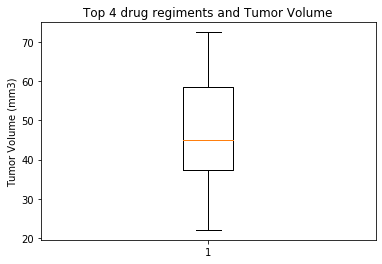

In [32]:
#generate a box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Top 4 drug regiments and Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(viable_df_sort['Tumor Volume (mm3)']) 

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen